In [ ]:
#Implementation of Two Player Tic-Tac-Toe game in Python.
import math
import copy
import matplotlib.pyplot as plt

''' We will have to print the updated board after every move in the game and 
    thus we will make a function in which we'll define the printBoard function
    so that we can easily print the board everytime by calling this function. '''

def printBoard(board):
    print(board[6] + '|' + board[7] + '|' + board[8])
    print('-+-+-')
    print(board[3] + '|' + board[4] + '|' + board[5])
    print('-+-+-')
    print(board[0] + '|' + board[1] + '|' + board[2])
    print("")
    
def checkWinner(board, endGame, is_max):
    if is_max:
        player = 'O'
    else:
        player = 'X'
    # Now we will check if player X or O has won,for every move after 5 moves. 
    if board[6] == board[7] == board[8] != ' ': # across the top
        if endGame:
            printBoard(board)
            print("\nGame Over.\n")                
            print(" **** " +player + " won. ****")
            return 9
        else:
            return evalTurn(player)
    elif board[3] == board[4] == board[5] != ' ': # across the middle
        if endGame:
            printBoard(board)
            print("\nGame Over.\n")                
            print(" **** " +player + " won. ****")
            return 9
        else:
            return evalTurn(player)
    elif board[0] == board[1] == board[2] != ' ': # across the bottom
        if endGame:
            printBoard(board)
            print("\nGame Over.\n")                
            print(" **** " +player + " won. ****")
            return 9
        else:
            return evalTurn(player)
    elif board[0] == board[3] == board[6] != ' ': # down the left side
        if endGame:
            printBoard(board)
            print("\nGame Over.\n")                
            print(" **** " +player + " won. ****")
            return 9
        else:
            return evalTurn(player)
    elif board[1] == board[4] == board[7] != ' ': # down the middle
        if endGame:
            printBoard(board)
            print("\nGame Over.\n")                
            print(" **** " +player + " won. ****")
            return 9
        else:
            return evalTurn(player)
    elif board[2] == board[5] == board[8] != ' ': # down the right side
        if endGame:
            printBoard(board)
            print("\nGame Over.\n")                
            print(" **** " +player + " won. ****")
            return 9
        else:
            return evalTurn(player)
    elif board[6] == board[4] == board[2] != ' ': # diagonal
        if endGame:
            printBoard(board)
            print("\nGame Over.\n")                
            print(" **** " +player + " won. ****")
            return 9
        else:
            return evalTurn(player)
    elif board[0] == board[4] == board[8] != ' ': # diagonal
        if endGame:
            printBoard(board)
            print("\nGame Over.\n")                
            print(" **** " +player + " won. ****")
            return 9
        else:
            return evalTurn(player)
    elif len([x for x in board if x != ' ']) == 9:
        if endGame:
            printBoard(board)
            print("\nGame Over.\n")                
            print("It's a Tie!!")
            return 9
        else:
            return 0

# If neither X nor O wins and the board is full, we'll declare the result as 'tie'.
        

def evalTurn(turn):
    if turn == 'X':
        return -1
    else:
        return 1
    
def chooseMove(board,count):
    total_calc = 0
    poses = [empty for empty in range(len(board)) if board[empty] == ' ']
    vals = [-math.inf for empty in range(len(board)) if board[empty] == ' ']
    posVal = [poses,vals]
    for pos in poses:
        copied_board = copy.deepcopy(board)
        copied_board[pos] = 'O'
        total_calc += 1
        total_calc, eval_move = minimax(copied_board, count, False, total_calc)
        posVal[1][posVal[0].index(pos)] = eval_move
    selected_move = posVal[0][posVal[1].index(max(posVal[1]))]
    return total_calc, selected_move+1
    
def minimax(board, count, is_maximizer, total_calc):
    if checkWinner(board, False, not is_maximizer) != None:
        return total_calc, checkWinner(board,False, not is_maximizer)
    
    if is_maximizer:
        max_eval = -math.inf
        for pos in [empty for empty in range(len(board)) if board[empty] == ' ']:
            c_board = copy.deepcopy(board)
            c_board[pos] = 'O'
            count += 1
            total_calc += 1
            total_calc, eval_move = minimax(c_board,count,False,total_calc)
            max_eval = max(max_eval,eval_move)
        return total_calc, max_eval
    else:
        min_eval = math.inf
        for pos in [empty for empty in range(len(board)) if board[empty] == ' ']:
            c_board = copy.deepcopy(board)
            c_board[pos] = 'X'
            count += 1
            total_calc += 1
            total_calc, eval_move = minimax(c_board,count,True, total_calc)
            min_eval = min(min_eval,eval_move)
        return total_calc, min_eval
    
def chooseMove_with_ab(board,count,alpha,beta):
    total_calc = 0
    poses = [empty for empty in range(len(board)) if board[empty] == ' ']
    vals = [-math.inf for empty in range(len(board)) if board[empty] == ' ']
    posVal = [poses,vals]
    max_eval = -math.inf
    for pos in poses:
        copied_board = copy.deepcopy(board)
        copied_board[pos] = 'O'
        total_calc += 1
        total_calc, eval_move = minimax_with_ab(copied_board, count, False, alpha, beta, total_calc)
        posVal[1][posVal[0].index(pos)] = eval_move
        max_eval = max(max_eval,eval_move)
        alpha = max(alpha,eval_move)
        if beta <= alpha:
            break
    selected_move = posVal[0][posVal[1].index(max(posVal[1]))]
    return total_calc, selected_move+1    
    
def minimax_with_ab(board, count, is_maximizer, alpha, beta, total_calc):
    if checkWinner(board, False, not is_maximizer) != None:
        return total_calc, checkWinner(board,False, not is_maximizer)
    
    if is_maximizer:
        max_eval = -math.inf
        for pos in [empty for empty in range(len(board)) if board[empty] == ' ']:
            c_board = copy.deepcopy(board)
            c_board[pos] = 'O'
            total_calc += 1
            count += 1
            total_calc, eval_move = minimax_with_ab(c_board,count,False,alpha, beta, total_calc)
            max_eval = max(max_eval,eval_move)
            alpha = max(alpha,eval_move)
            if beta <= alpha:
                break
        return total_calc, max_eval
    else:
        min_eval = math.inf
        for pos in [empty for empty in range(len(board)) if board[empty] == ' ']:
            c_board = copy.deepcopy(board)
            c_board[pos] = 'X'
            count += 1
            total_calc += 1
            total_calc, eval_move = minimax_with_ab(c_board,count,True,alpha, beta, total_calc)
            min_eval = min(min_eval,eval_move)
            beta = min(beta,eval_move)
            if beta <= alpha:
                break
        return total_calc, min_eval
    
# Now we'll write the main function which has all the gameplay functionality.
def game(with_ab = False):
    ''' We will make the board using list 
        in which indices will be the location(i.e : top-left,mid-right,etc.)
        and initialliy it's values will be empty space and then after every move 
        we will change the value according to player's choice of move. '''

    theBoard = [' ',' ',' ',' ',' ',' ',' ',' ',' ']

    turn = 'X'
    count = 0
    player = False
    endGame = False
    calculations = []
    select_ab = input("Do you want to use Alpha-Beta Pruning?(y/n)")
    if select_ab == "y" or select_ab == "Y":
        with_ab = True
    else:
        with_ab = False
            
    while endGame == False:
        printBoard(theBoard)
        print("It's your turn, " + turn + " .Move to which place?")
        if turn == "X":
            move = int(input())        
        else:
            ##added by Deniz Mert Tecimer
            copy_board = copy.deepcopy(theBoard)
            if with_ab == False:
                calc, move = chooseMove(copy_board,count)
            else:
                calc, move = chooseMove_with_ab(copy_board, count, -math.inf, math.inf)
            calculations.append(calc)
            
        if theBoard[move-1] == ' ':
            theBoard[move-1] = turn
            count += 1
        else:
            print("That place is already filled.\nMove to which place?")
            continue
        
        if checkWinner(theBoard,True, player) != None:
            endGame = True
            plt.plot(calculations)
            plt.ylabel('Number of Visited States')
            plt.xlabel('Move Number')
            plt.show()
            print("Number of calculations made:" , calculations)
            break
            
        # Now we have to change the player after every move.
        if turn =='X':
            player = True
            turn = 'O'
        else:
            player = False
            turn = 'X'        
    
    # Now we will ask if player wants to restart the game or not.
    restart = input("Do want to play Again?(y/n)")
    if restart == "y" or restart == "Y":
        game()

Do you want to use Alpha-Beta Pruning?(y/n)y
 | | 
-+-+-
 | | 
-+-+-
 | | 

It's your turn, X .Move to which place?
5
 | | 
-+-+-
 |X| 
-+-+-
 | | 

It's your turn, O .Move to which place?
 | | 
-+-+-
 |X| 
-+-+-
O| | 

It's your turn, X .Move to which place?
6
 | | 
-+-+-
 |X|X
-+-+-
O| | 

It's your turn, O .Move to which place?
 | | 
-+-+-
O|X|X
-+-+-
O| | 

It's your turn, X .Move to which place?
3
 | | 
-+-+-
O|X|X
-+-+-
O| |X

It's your turn, O .Move to which place?
O| | 
-+-+-
O|X|X
-+-+-
O| |X


Game Over.

 **** O won. ****


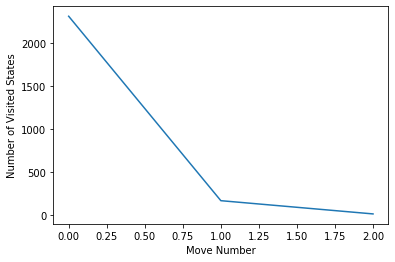

Number of calculations made: [2315, 170, 16]


In [ ]:
if __name__ == "__main__":
    game()